<a href="https://colab.research.google.com/github/jaylin0418/Foundations_of_Artificial_Intelligence-2024-Spring-CSIE3005-/blob/main/intro_AI_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# 1. 下載手寫數字數據集
digits = load_digits()
data = digits.data  # (1797, 64)，每個數字是一個 8x8 的圖像展平為 64 維
labels = digits.target  # 真實標籤 (0-9)


In [ ]:
# 2. 使用 KNN 進行分類
# 將數據集分為訓練集和測試集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# 定義 KNN 模型，選擇適當的 k 值
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 預測
predicted_labels = knn.predict(X_test)

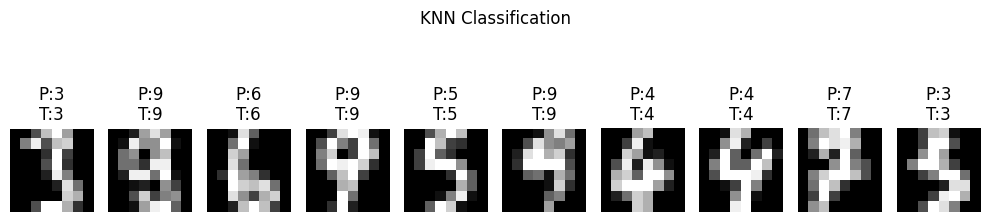

In [ ]:
# 3. 視覺化分類結果
def plot_digits(data, predicted_labels, true_labels, title):
    fig, axes = plt.subplots(1, 10, figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.set_axis_off()
        ax.imshow(data[i].reshape(8, 8), cmap='gray')
        ax.set_title(f"P:{predicted_labels[i]}\nT:{true_labels[i]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# 隨機選擇 10 個數字，顯示其分類結果
rng = np.random.default_rng()
indices = rng.choice(len(X_test), size=10, replace=False)
plot_digits(X_test[indices], predicted_labels[indices], y_test[indices], "KNN Classification")

In [ ]:
# 4. 顯示與真實標籤的比較
print("Predicted labels: ", predicted_labels[indices])
print("True labels:      ", y_test[indices])

# 5. 計算分類準確率
accuracy = accuracy_score(y_test, predicted_labels)
print(f"KNN 分類準確率: {accuracy * 100:.2f}%")

Predicted labels:  [3 9 6 9 5 9 4 4 7 3]
True labels:       [3 9 6 9 5 9 4 4 7 3]
KNN 分類準確率: 98.89%
